Loading data from CSV file. First model will use only total_volume_24h data

In [1]:
import pandas as pd

df = pd.read_csv("cmc_market_hourly.csv")
df["timestamp"] = pd.to_datetime(df["timestamp"])
df.sort_values("timestamp").reset_index(drop=True)

df.tail()

,timestamp,total_market_cap,total_volume_24h,total_volume_24h_reported,altcoin_market_cap,altcoin_volume_24h,altcoin_volume_24h_reported
8636,2025-04-18 23:45:00+00:00,2.663589e+12,4.466339e+10,2.689120e+11,9.866787e+11,3.197045e+10,2.015831e+11
8637,2025-04-18 23:50:00+00:00,2.663492e+12,4.458681e+10,2.690797e+11,9.870101e+11,3.189565e+10,2.017357e+11
8638,2025-04-18 23:55:00+00:00,2.662779e+12,4.461812e+10,2.691684e+11,9.866987e+11,3.193180e+10,2.018412e+11
8639,2025-04-19 00:00:00+00:00,2.663370e+12,4.467855e+10,2.693401e+11,9.867543e+11,3.195054e+10,2.020169e+11
8640,2025-04-19 00:05:00+00:00,2.663696e+12,4.455600e+10,2.675956e+11,9.868494e+11,3.188297e+10,2.009301e+11


In [15]:
df["target"] = df["total_volume_24h"].shift(-1)

df["lag_1"] = df["total_volume_24h"].shift(0)
df["lag_2"] = df["total_volume_24h"].shift(1)
df["lag_3"] = df["total_volume_24h"].shift(2)

df_model = df[["target", "lag_1", "lag_2", "lag_3"]].dropna()

X = df_model[["lag_1", "lag_2", "lag_3"]]
y = df_model["target"]

In [16]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=False)

In [17]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [19]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

y_pred = model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error: {mse:.4f}")
print(f"Mean Absolute Error: {mae:.4f}")
print(f"R2 Score: {r2:.4f}")

Mean Squared Error: 336150627800588224.0000
Mean Absolute Error: 428781794.0923
R2 Score: 0.9967


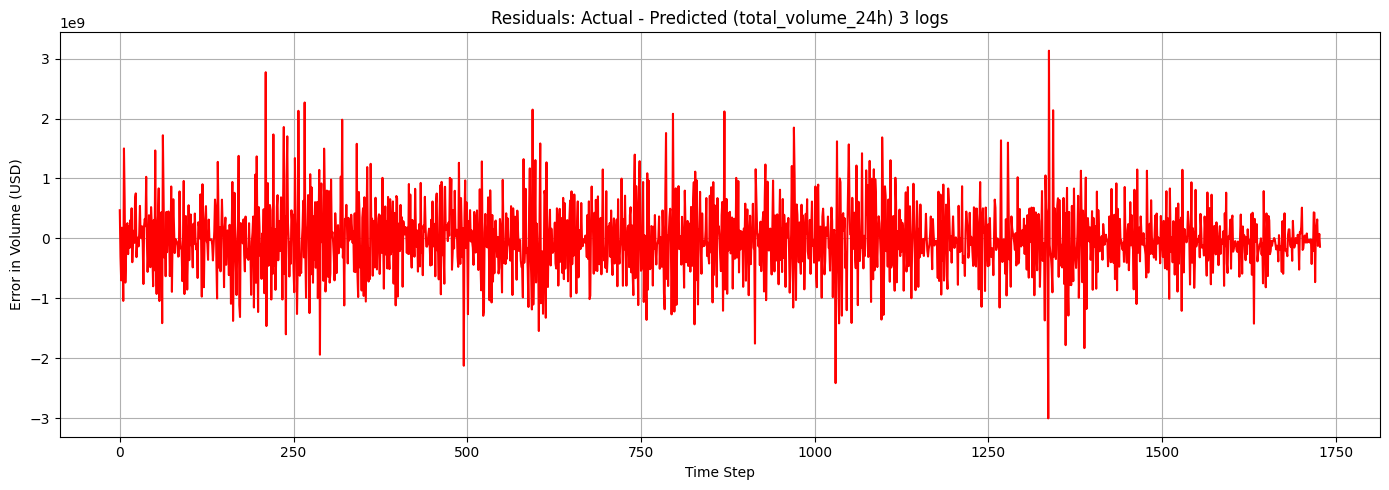

In [20]:
import matplotlib.pyplot as plt

y_true = pd.Series(y_test.values).reset_index(drop=True)
y_pred_series = pd.Series(y_pred).reset_index(drop=True)

residuals = y_true - y_pred_series

plt.figure(figsize=(14, 5))
plt.plot(residuals, color="red")
plt.title("Residuals: Actual - Predicted (total_volume_24h) 3 logs")
plt.xlabel("Time Step")
plt.ylabel("Error in Volume (USD)")
plt.grid(True)
plt.tight_layout()
plt.show()

In [21]:
import numpy as np

df["log_total_volume_24h"] = np.log(df["total_volume_24h"])

df["log_target"] = df["log_total_volume_24h"].shift(-1)

for i in range(1, 4):
    df[f"lag_{i}"] = df["log_total_volume_24h"].shift(i)

lag_cols = [f"lag_{i}" for i in range(1, 4)]
df_model = df[["log_target"] + lag_cols].dropna()

X = df_model[lag_cols]
y = df_model["log_target"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=False)

model = LinearRegression()
model.fit(X_train, y_train)

y_pred = model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error: {mse:.4f}")
print(f"Mean Absolute Error: {mae:.4f}")
print(f"R2 Score: {r2:.4f}")

Mean Squared Error: 0.0001
Mean Absolute Error: 0.0079
R2 Score: 0.9951


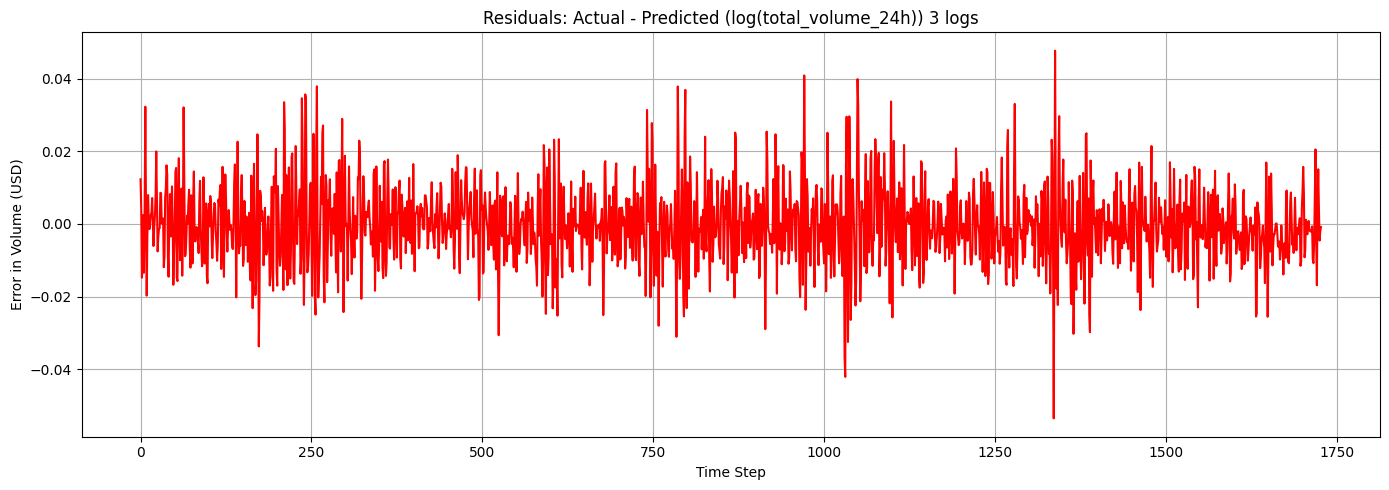

In [22]:
y_true = pd.Series(y_test.values).reset_index(drop=True)
y_pred_series = pd.Series(y_pred).reset_index(drop=True)

residuals = y_true - y_pred_series

plt.figure(figsize=(14, 5))
plt.plot(residuals, color="red")
plt.title("Residuals: Actual - Predicted (log(total_volume_24h)) 3 logs")
plt.xlabel("Time Step")
plt.ylabel("Error in Volume (USD)")
plt.grid(True)
plt.tight_layout()
plt.show()

In [24]:
df["log_total_volume_24h"] = np.log(df["total_volume_24h"])

df["log_target"] = df["log_total_volume_24h"].shift(-1)

for i in range(1, 7):
    df[f"lag_{i}"] = df["log_total_volume_24h"].shift(i)

lag_cols = [f"lag_{i}" for i in range(1, 7)]
df_model = df[["log_target"] + lag_cols].dropna()

X = df_model[lag_cols]
y = df_model["log_target"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=False)

model = LinearRegression()
model.fit(X_train, y_train)

y_pred = model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error: {mse:.4f}")
print(f"Mean Absolute Error: {mae:.4f}")
print(f"R2 Score: {r2:.4f}")

Mean Squared Error: 0.0001
Mean Absolute Error: 0.0072
R2 Score: 0.9959


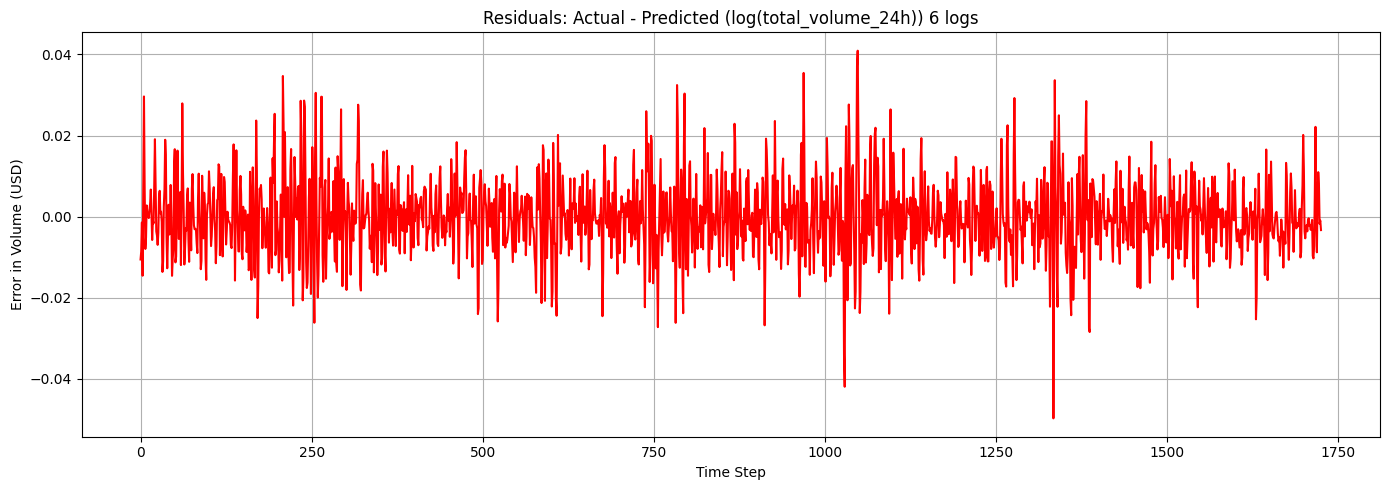

In [29]:
y_true = pd.Series(y_test.values).reset_index(drop=True)
y_pred_series = pd.Series(y_pred).reset_index(drop=True)

residuals = y_true - y_pred_series

plt.figure(figsize=(14, 5))
plt.plot(residuals, color="red")
plt.title("Residuals: Actual - Predicted (log(total_volume_24h)) 6 logs")
plt.xlabel("Time Step")
plt.ylabel("Error in Volume (USD)")
plt.grid(True)
plt.tight_layout()
plt.show()

In [27]:
df["log_total_volume_24h"] = np.log(df["total_volume_24h"])

df["log_target"] = df["log_total_volume_24h"].shift(-1)

for i in range(1, 13):
    df[f"lag_{i}"] = df["log_total_volume_24h"].shift(i)

lag_cols = [f"lag_{i}" for i in range(1, 13)]
df_model = df[["log_target"] + lag_cols].dropna()

X = df_model[lag_cols]
y = df_model["log_target"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=False)

model = LinearRegression()
model.fit(X_train, y_train)

y_pred = model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error: {mse:.4f}")
print(f"Mean Absolute Error: {mae:.4f}")
print(f"R2 Score: {r2:.4f}")

Mean Squared Error: 0.0001
Mean Absolute Error: 0.0070
R2 Score: 0.9961


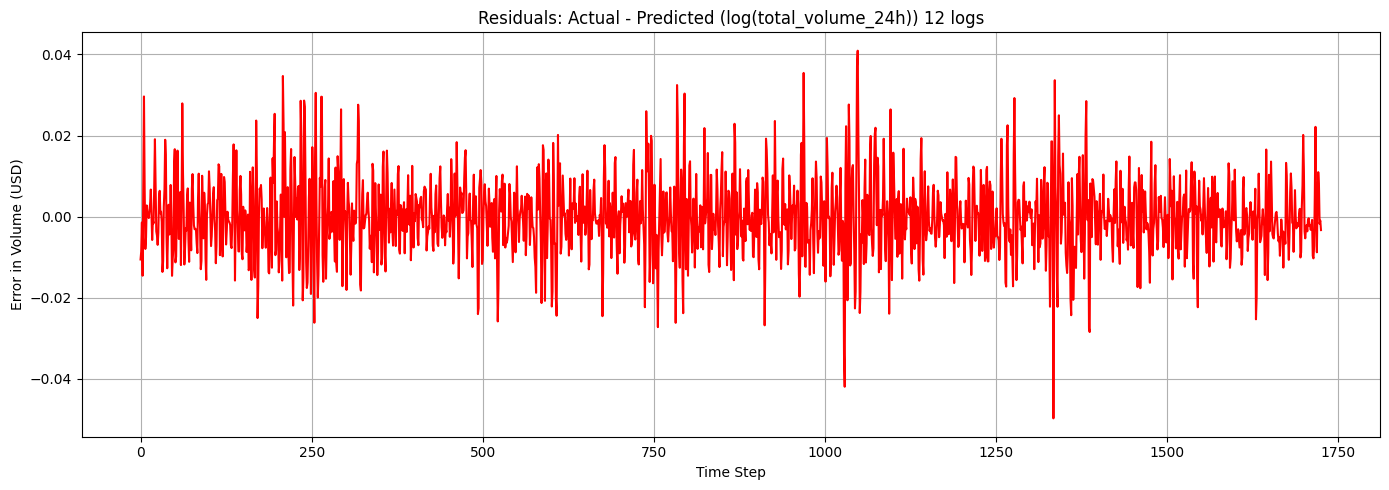

In [28]:
y_true = pd.Series(y_test.values).reset_index(drop=True)
y_pred_series = pd.Series(y_pred).reset_index(drop=True)

residuals = y_true - y_pred_series

plt.figure(figsize=(14, 5))
plt.plot(residuals, color="red")
plt.title("Residuals: Actual - Predicted (log(total_volume_24h)) 12 logs")
plt.xlabel("Time Step")
plt.ylabel("Error in Volume (USD)")
plt.grid(True)
plt.tight_layout()
plt.show()